# Descriptive statistics problems

### Exercise 1

We will use Numpy to obtain information to describe statistically.

- Generate an array of 100 elements following a normal distribution.
- Generate an array of 100 elements following a chi-square distribution with 3 degrees of freedom.
- Calculate the main metrics and statistical measures that best describe the two vectors.

Para la distribución normal:
La media es: 1.168147822937538
La mediana es: -0.2916067558695528
La moda es: -14.247813241011759
El rango es: 86.74996481256892
La varianza es: 347.3803579598921
La desviación típica: 18.63814255659324
La asimetría(skewness): 0.054841365349443616
La curtosis: -0.29729147071439277


Para la distribución chi-cuadrado:
La media es: 2.428475675917951
La mediana es: 2.054922985683459
La moda es: 0.8663943377237896
El rango es: 6.361784249342817
La varianza es: 2.6259720427931357
La desviación típica: 1.6204851257549808
La asimetría(skewness): 0.6368275665389682
La curtosis: -0.6198026725465704

Intervalos de Confianza para la Distribución Normal:
95.0%: (-2.548694925647316, 4.884990571522392)
98.0%: (-3.2612408800755057, 5.597536525950582)
99.0%: (-3.751644878151204, 6.08794052402628)

Intervalos de Confianza para la Distribución Chi-cuadrado:
95.0%: (2.105316414174814, 2.751634937661088)
98.0%: (2.0433644188479354, 2.813586932987967)
99.0%: (2.000726458435334,

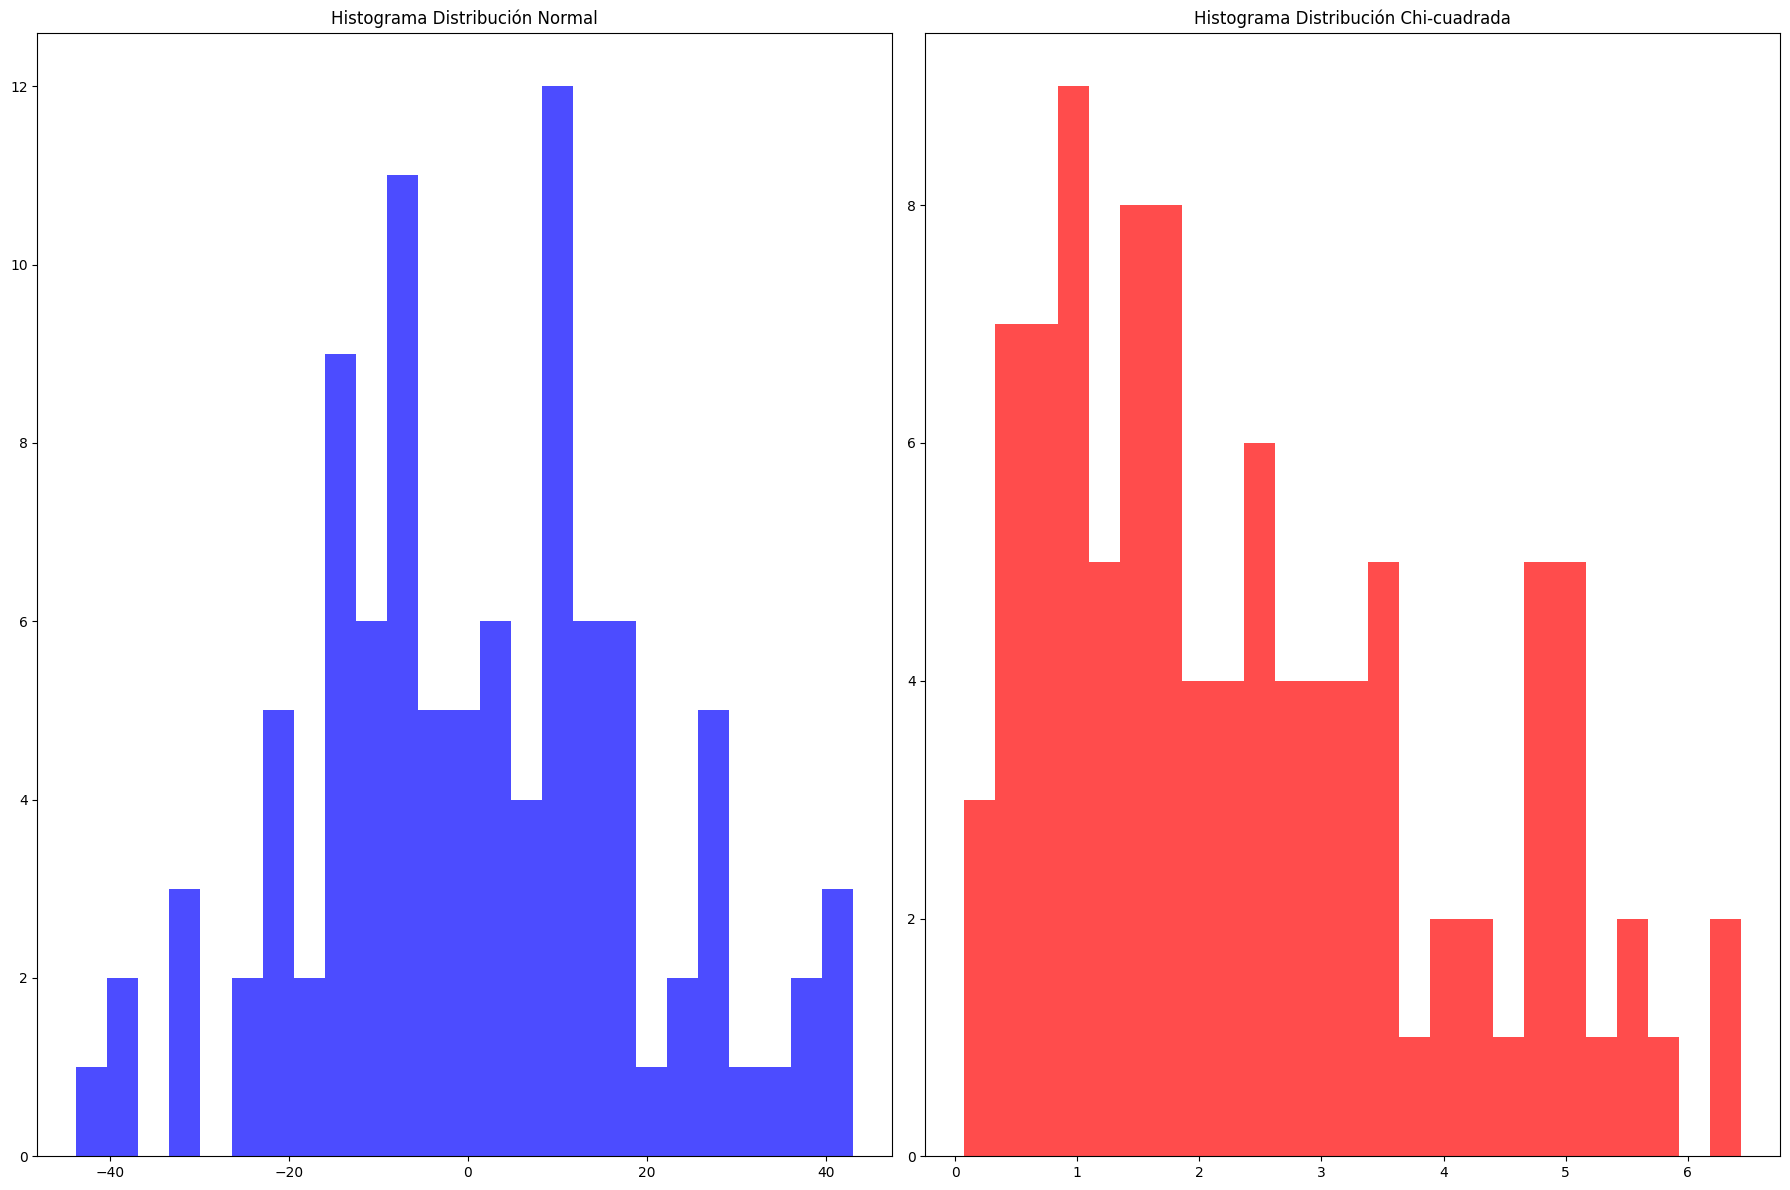

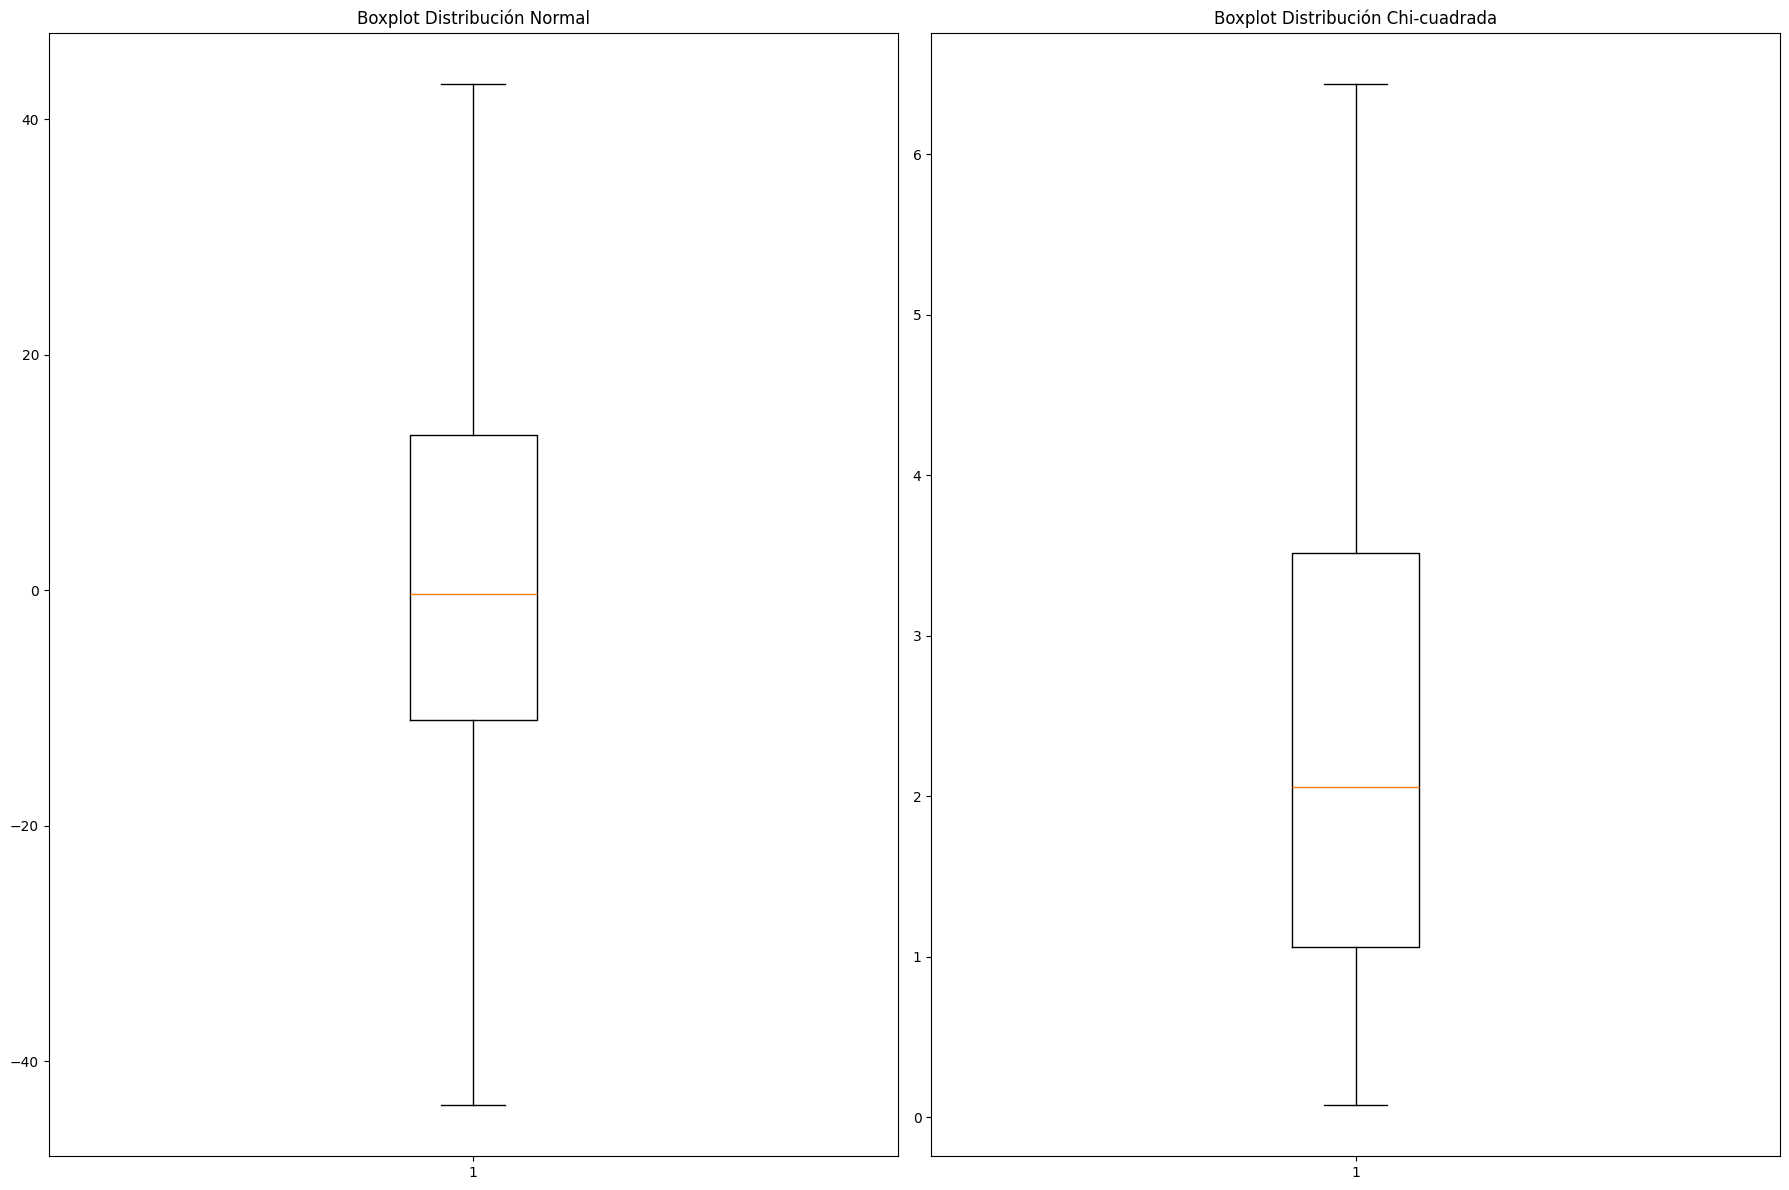

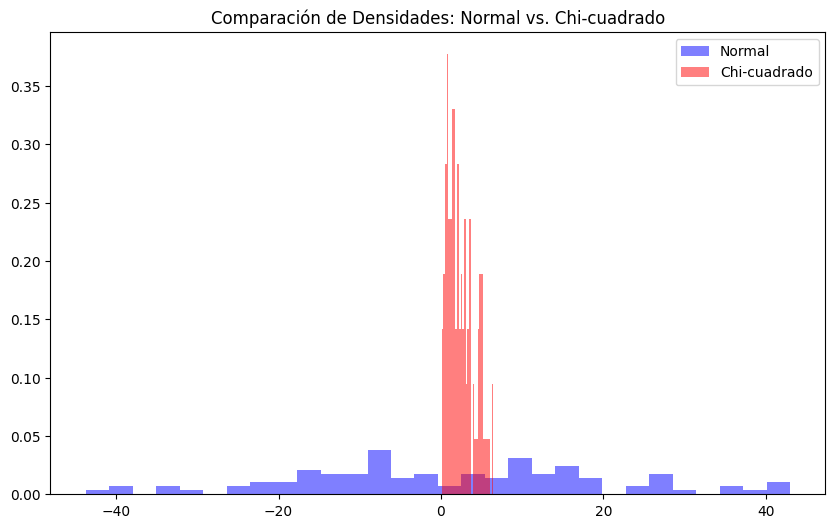

In [3]:
import numpy as np
import statistics as stats
from scipy.stats import skew, kurtosis, sem, t
import matplotlib.pyplot as plt

np.random.seed(13)
normal_array = np.random.normal(0, 20, 100)
chi_square_array = np.random.chisquare(3,100)

normal_array_mean = np.mean(normal_array)
normal_array_median = np.median(normal_array)
normal_array_mode = stats.mode(normal_array) #La moda no es muy útil en datos continuos, ya que es muy difícil que se repita. La calculamos pero no le damos importancia alguna.
normal_array_range = max(normal_array) - min(normal_array)
normal_array_variance = np.var(normal_array)
normal_array_std = np.std(normal_array)
normal_array_skew = skew(normal_array)
normal_array_kurtosis = kurtosis(normal_array)

chi_square_array_mean = np.mean(chi_square_array)
chi_square_array_median = np.median(chi_square_array)
chi_square_array_mode = stats.mode(chi_square_array) #La moda no es muy útil en datos continuos, ya que es muy difícil que se repita. La calculamos pero no le damos importancia alguna.
chi_square_array_range = max(chi_square_array) - min(chi_square_array)
chi_square_array_variance = np.var(chi_square_array)
chi_square_array_std = np.std(chi_square_array)
chi_square_array_skew = skew(chi_square_array)
chi_square_array_kurtosis = kurtosis(chi_square_array)


print(f"Para la distribución normal:\nLa media es: {normal_array_mean}\nLa mediana es: {normal_array_median}\nLa moda es: {normal_array_mode}\nEl rango es: {normal_array_range}\nLa varianza es: {normal_array_variance}\nLa desviación típica: {normal_array_std}\nLa asimetría(skewness): {normal_array_skew}\nLa curtosis: {normal_array_kurtosis}\n\n")
print(f"Para la distribución chi-cuadrado:\nLa media es: {chi_square_array_mean}\nLa mediana es: {chi_square_array_median}\nLa moda es: {chi_square_array_mode}\nEl rango es: {chi_square_array_range}\nLa varianza es: {chi_square_array_variance}\nLa desviación típica: {chi_square_array_std}\nLa asimetría(skewness): {chi_square_array_skew}\nLa curtosis: {chi_square_array_kurtosis}")


def calcular_intervalo_confianza(data, confianza):
    n = len(data)
    media_muestra = np.mean(data)
    error_std_media = sem(data)  
    margen_error = error_std_media * t.ppf((1 + confianza) / 2., n-1)
    return media_muestra - margen_error, media_muestra + margen_error

niveles_confianza = [0.95, 0.98, 0.99]

intervalos_normal = {conf: calcular_intervalo_confianza(normal_array, conf) for conf in niveles_confianza}
intervalos_chi_cuadrado = {conf: calcular_intervalo_confianza(chi_square_array, conf) for conf in niveles_confianza}

print("\nIntervalos de Confianza para la Distribución Normal:")
for conf, intervalo in intervalos_normal.items():
    print(f"{conf*100}%: {intervalo}")

print("\nIntervalos de Confianza para la Distribución Chi-cuadrado:")
for conf, intervalo in intervalos_chi_cuadrado.items():
    print(f"{conf*100}%: {intervalo}")


plt.figure(figsize=(18,12))

plt.subplot(1,2,1)
plt.hist(normal_array, bins = 25, alpha = 0.7, color= 'blue')
plt.title('Histograma Distribución Normal')

plt.subplot(1,2,2)
plt.hist(chi_square_array, bins = 25, alpha = 0.7, color = 'red')
plt.title('Histograma Distribución Chi-cuadrada')

plt.tight_layout()
plt.show()

plt.figure(figsize=(18,12))
plt.subplot(1,2,1)
plt.boxplot(normal_array)
plt.title('Boxplot Distribución Normal')

plt.subplot(1,2,2)
plt.boxplot(chi_square_array)
plt.title('Boxplot Distribución Chi-cuadrada')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

plt.hist(normal_array, bins=30, alpha=0.5, label='Normal', density=True, color='blue')
plt.hist(chi_square_array, bins=30, alpha=0.5, label='Chi-cuadrado', density=True, color='red')
plt.title('Comparación de Densidades: Normal vs. Chi-cuadrado')
plt.legend()
plt.show()




### Exercise 2

Write a Python program to calculate the standard deviation of the following data:

```py
data = [4, 2, 5, 8, 6]
```

In [5]:
data = [4, 2, 5, 8, 6]
N = len(data)
# media = np.mean(data)
media = sum(data)/N
sumatorio = 0
for i in range (N):
    x = (data[i] - media)**2
    sumatorio += x
desviacion_tip = np.sqrt(sumatorio/(N-1))
print (f"La desviación típica es {desviacion_tip:.3f}")


La desviación típica es 2.236
